### Import modules

In [1]:
# imports
import sys
import os

from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

from functions_EDX import *
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from sklearn.metrics import DistanceMetric
import tifffile as tif

Text(0.5, 1.0, 'HAADF')

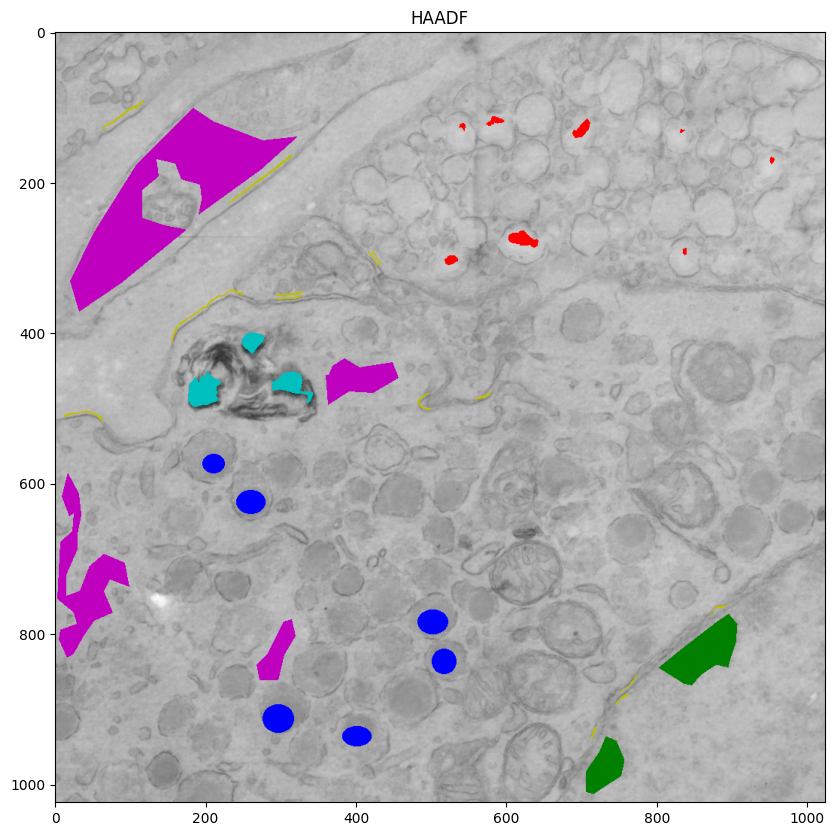

In [38]:
# load haadf
file_names = os.listdir('/Volumes/Microscopy3/EDX_data/old_datasets/NPZ')
file_names = [name for name in file_names if name.endswith('npz')]
file_names = sorted(file_names)
file_path = os.path.join('/Volumes/Microscopy3/EDX_data/old_datasets/NPZ',file_names[10])
loaded_file = np.load(file_path)
haadf =  haadf = rebin_XY(loaded_file['haadf'],1024)       

size_xy = 1024
mask_dir = "hand_annotated"
file_names = os.listdir(mask_dir)
file_names = [name for name in file_names if name.endswith('tif')]
file_names.sort()

mask_paths = [os.path.join(mask_dir,file_name) for file_name in file_names]


colors = ['w','r','g','b','c','m','y']
newcmap = ListedColormap(colors)
all_masks = np.zeros((size_xy,size_xy),dtype='int')
for i in range(6):
    x = tif.imread(mask_paths[i])
    x = rebin_XY(x).astype('bool')
    #print(np.unique(x*(i+1)))
    all_masks = all_masks + x*(i+1)

# make an overlay image
colorsrgb = [mcolors.to_rgb(newcmap(i)) for i in range(newcmap.N)] # the colors in the cmap
haadf_overlayed = np.repeat((1-normalize8(haadf)/255)[:, :, np.newaxis], 3, axis=2)
for i in range(1,7):
    haadf_overlayed[np.where(all_masks==i)[0],np.where(all_masks==i)[1]] = colorsrgb[i]


f,ax = plt.subplots(figsize=(10,10))
ax.imshow(haadf_overlayed)
ax.set_title('Annotated masks')
ax.set_title('HAADF')

In [12]:
all_masks.shape

(1024, 1024)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


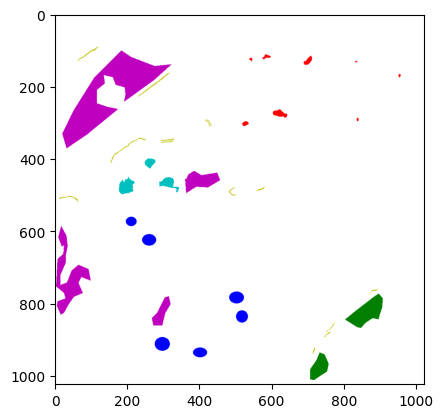

In [25]:
plt.imshow(haadf_overlayed)

In [26]:
haadf.dtype

dtype('float64')

In [27]:
colorsrgb

[(1.0, 1.0, 1.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.5, 0.0),
 (0.0, 0.0, 1.0),
 (0.0, 0.75, 0.75),
 (0.75, 0.0, 0.75),
 (0.75, 0.75, 0.0)]

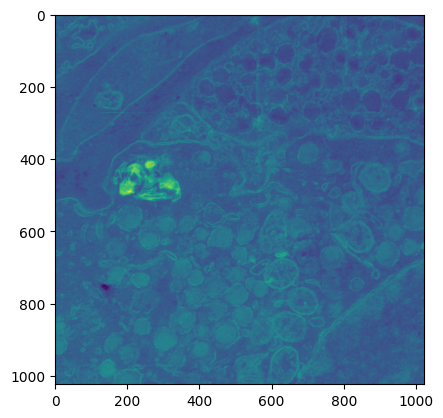

In [31]:
plt.imshow(haadf)

In [34]:
(normalize8(haadf)/255).dtype

dtype('float64')